<a href="https://colab.research.google.com/github/smudita/Natural-Language-Processing---/blob/main/Sarcasm_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# sarcasm.json
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v

Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/sarcasm.json
5.64MB [00:00, 4.26MB/s]


In [ ]:
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)
print(len(datastore))
sentences=[]
labels=[]

for i in datastore:
  sentences.append(i['headline'])
  labels.append(i['is_sarcastic'])

26709


In [ ]:
training_size= 20000   # lets train on 20k and validate on the rest
training_sentences= sentences[0:training_size]
testing_sentences=sentences[training_size:]

training_labels= labels[0:training_size]
testing_labels=labels[training_size:]

In [ ]:
oov_tok= "<OOV>"
vocab_size = 10000
tokenizer = Tokenizer(vocab_size,oov_tok)
tokenizer.fit_on_texts(training_sentences)   

word_index = tokenizer.word_index 



In [ ]:
max_length = 1000
trunc_type='post'
padding_type='post'

#training data
training_sequences = tokenizer.texts_to_sequences(training_sentences) 
training_padded = pad_sequences(training_sequences, max_length,padding=padding_type,truncating=trunc_type)  

#testing/validation data
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) 
testing_padded = pad_sequences(testing_sequences, max_length,padding=padding_type,truncating=trunc_type)  

In [ ]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 16)          160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - loss: 0.6862 - accuracy: 0.5593 - val_loss: 0.6848 - val_accuracy: 0.5633
Epoch 2/30
625/625 - 3s - loss: 0.6837 - accuracy: 0.5603 - val_loss: 0.6808 - val_accuracy: 0.5633
Epoch 3/30
625/625 - 3s - loss: 0.6633 - accuracy: 0.5824 - val_loss: 0.6297 - val_accuracy: 0.6198
Epoch 4/30
625/625 - 3s - loss: 0.5592 - accuracy: 0.7617 - val_loss: 0.5082 - val_accuracy: 0.7520
Epoch 5/30
625/625 - 3s - loss: 0.4396 - accuracy: 0.8281 - val_loss: 0.4304 - val_accuracy: 0.8168
Epoch 6/30
625/625 - 3s - loss: 0.3783 - accuracy: 0.8498 - val_loss: 0.3991 - val_accuracy: 0.8317
Epoch 7/30
625/625 - 3s - loss: 0.3473 - accuracy: 0.8615 - val_loss: 0.4222 - val_accuracy: 0.7980
Epoch 8/30
625/625 - 3s - loss: 0.3229 - accuracy: 0.8704 - val_loss: 0.3741 - val_accuracy: 0.8425
Epoch 9/30
625/625 - 3s - loss: 0.3052 - accuracy: 0.8785 - val_loss: 0.3679 - val_accuracy: 0.8445
Epoch 10/30
625/625 - 3s - loss: 0.2890 - accuracy: 0.8839 - val_loss: 0.3614 - val_accuracy: 0.8463

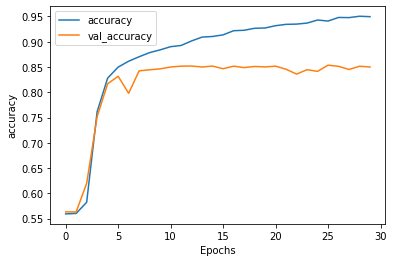

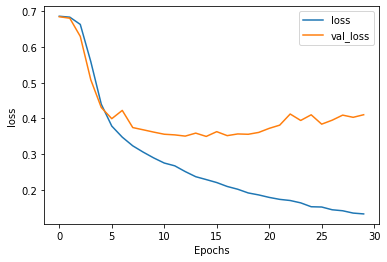

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Here the accuracy is increasing but loss function is decreasing .So while the number of accurate predictions increased over time, what was interesting was that the confidence per prediction effectively decreased
We can tweak the hyperparameters to get better outcomes for this we can put the hyperparameters as separate variables:


In [ ]:

"""
vocab_size = 100
embedding_dim = 32
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000
"""


'\n   vocab_size = 100\n  embedding_dim = 32\n  max_length = 100\n  trunc_type=\'post\'\n  padding_type=\'post\'\n  oov_tok = "<OOV>"\n  training_size = 20000\n'

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former store clerk sues over secret 'black for minority ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? 

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.6976842]
 [0.1657508]]
